PART 1:SUBSLICES

In [ ]:
pip install librosa


Note: you may need to restart the kernel to use updated packages.


In [ ]:
import pandas as pd
import numpy as np
import math

import librosa as lb # https://librosa.github.io/librosa/
import soundfile as sf # https://pysoundfile.readthedocs.io/en/latest/

import os

import matplotlib.pyplot as plt
from matplotlib.cbook import boxplot_stats

In [ ]:
!ls ../input/respiratory-sound-database/respiratory_sound_database/Respiratory_Sound_Database


ls: ../input/respiratory-sound-database/respiratory_sound_database/Respiratory_Sound_Database: No such file or directory


In [ ]:
!ls Downloads/input/Respiratory_Sound_Database/Respiratory_Sound_Database

audio_and_txt_files      filename_format.txt
filename_differences.txt patient_diagnosis.csv


In [ ]:
#load patient diagnosis.csv

diag_csv = 'Downloads/input/Respiratory_Sound_Database/Respiratory_Sound_Database/patient_diagnosis.csv'
diagnosis = pd.read_csv(diag_csv, names=['pId', 'diagnosis'])
diagnosis.head()

,pId,diagnosis
0,101,URTI
1,102,Healthy
2,103,Asthma
3,104,COPD
4,105,URTI


In [ ]:
ds = diagnosis['diagnosis'].unique()
ds

array(['URTI', 'Healthy', 'Asthma', 'COPD', 'LRTI', 'Bronchiectasis',
       'Pneumonia', 'Bronchiolitis'], dtype=object)

In [ ]:
#get all text files
audio_text_loc = 'Downloads/input/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files'
files = [s.split('.')[0] for s in os.listdir(path = audio_text_loc) if '.txt' in s]
files


['148_1b1_Al_sc_Meditron',
 '130_3p2_Tc_mc_AKGC417L',
 '107_2b4_Al_mc_AKGC417L',
 '160_2b4_Pr_mc_AKGC417L',
 '174_1p4_Ar_mc_AKGC417L',
 '114_1b4_Pl_mc_AKGC417L',
 '138_1p2_Ll_mc_AKGC417L',
 '130_3b4_Lr_mc_AKGC417L',
 '141_1b2_Tc_mc_LittC2SE',
 '193_1b4_Lr_mc_AKGC417L',
 '162_1b2_Lr_mc_AKGC417L',
 '198_6p1_Ll_mc_AKGC417L',
 '156_2b3_Pl_mc_AKGC417L',
 '115_1b1_Ar_sc_Meditron',
 '174_1p2_Pr_mc_AKGC417L',
 '224_1b2_Al_sc_Meditron',
 '158_1p2_Tc_mc_AKGC417L',
 '147_2b3_Ll_mc_AKGC417L',
 '151_2p3_Pl_mc_AKGC417L',
 '107_3p2_Lr_mc_AKGC417L',
 '216_1b1_Al_sc_Meditron',
 '163_2b2_Ll_mc_AKGC417L',
 '177_2b4_Tc_mc_AKGC417L',
 '155_2b1_Al_mc_LittC2SE',
 '193_7b3_Tc_mc_AKGC417L',
 '173_1b1_Al_sc_Meditron',
 '170_2b2_Lr_mc_AKGC417L',
 '130_2b3_Pr_mc_AKGC417L',
 '203_1p2_Al_mc_AKGC417L',
 '130_1p2_Pr_mc_AKGC417L',
 '138_1p3_Tc_mc_AKGC417L',
 '218_1p1_Pr_sc_Litt3200',
 '160_1b2_Pl_mc_AKGC417L',
 '166_1p1_Pr_sc_Meditron',
 '176_2b3_Ll_mc_AKGC417L',
 '211_1p2_Pr_mc_AKGC417L',
 '104_1b1_Ar_sc_Litt3200',
 

In [ ]:
def tokenize_file(filename):
    return filename.split('_')

In [ ]:
#read each file

files_ = []
for f in files:
    df = pd.read_csv(audio_text_loc + '/' + f + '.txt', sep='\t', names=['start', 'end', 'crackles', 'wheezes'])
    df['filename'] = f
    #get filename features
    f_features = tokenize_file(f)
    df['pId'] = f_features[0]
    df['ac_mode'] = f_features[3]

    files_.append(df)

files_df = pd.concat(files_)
files_df.reset_index()
files_df.head()

,start,end,crackles,wheezes,filename,pId,ac_mode
0,0.022,0.364,0,0,148_1b1_Al_sc_Meditron,148,sc
1,0.364,2.436,0,0,148_1b1_Al_sc_Meditron,148,sc
2,2.436,4.636,0,0,148_1b1_Al_sc_Meditron,148,sc
3,4.636,6.793,0,0,148_1b1_Al_sc_Meditron,148,sc
4,6.793,8.750,0,0,148_1b1_Al_sc_Meditron,148,sc


In [ ]:
files_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6898 entries, 0 to 3
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   start     6898 non-null   float64
 1   end       6898 non-null   float64
 2   crackles  6898 non-null   int64  
 3   wheezes   6898 non-null   int64  
 4   filename  6898 non-null   object 
 5   pId       6898 non-null   object 
 6   ac_mode   6898 non-null   object 
dtypes: float64(2), int64(2), object(3)
memory usage: 431.1+ KB


In [ ]:
diagnosis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   pId        126 non-null    int64 
 1   diagnosis  126 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.1+ KB


In [ ]:
files_df['pId'] = files_df['pId'].astype('float64')
files_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 6898 entries, 0 to 3
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   start     6898 non-null   float64
 1   end       6898 non-null   float64
 2   crackles  6898 non-null   int64  
 3   wheezes   6898 non-null   int64  
 4   filename  6898 non-null   object 
 5   pId       6898 non-null   float64
 6   ac_mode   6898 non-null   object 
dtypes: float64(3), int64(2), object(2)
memory usage: 431.1+ KB


In [ ]:
files_df = pd.merge(files_df, diagnosis, on='pId')
files_df.head()

,start,end,crackles,wheezes,filename,pId,ac_mode,diagnosis
0,0.022,0.364,0,0,148_1b1_Al_sc_Meditron,148.0,sc,URTI
1,0.364,2.436,0,0,148_1b1_Al_sc_Meditron,148.0,sc,URTI
2,2.436,4.636,0,0,148_1b1_Al_sc_Meditron,148.0,sc,URTI
3,4.636,6.793,0,0,148_1b1_Al_sc_Meditron,148.0,sc,URTI
4,6.793,8.750,0,0,148_1b1_Al_sc_Meditron,148.0,sc,URTI


In [ ]:
#code taken from eatmygoose https://www.kaggle.com/eatmygoose/cnn-detection-of-wheezes-and-crackles
def slice_data(start, end, raw_data,  sample_rate):
    max_ind = len(raw_data)
    start_ind = min(int(start * sample_rate), max_ind)
    end_ind = min(int(end * sample_rate), max_ind)
    return raw_data[start_ind: end_ind]

In [ ]:
files_df['len_per_slice'] = files_df['end'].sub(files_df['start'], axis = 0)
max_len_per_slice = max(files_df['len_per_slice'])
max_len_per_slice

16.163

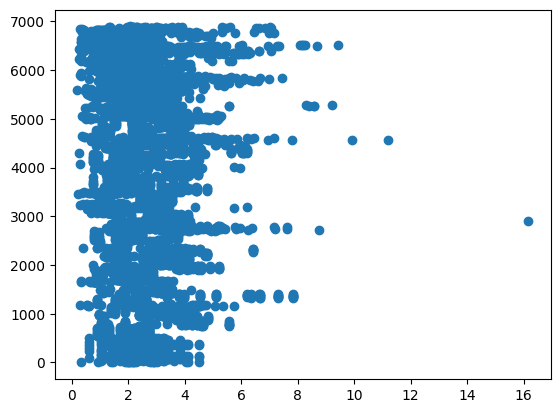

In [ ]:
plt.scatter(files_df['len_per_slice'], y=files_df.index)

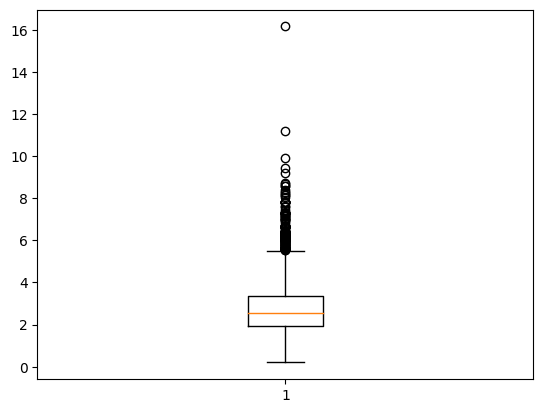

In [ ]:
box = plt.boxplot(files_df['len_per_slice'])

In [ ]:
force_max_len = math.ceil(boxplot_stats(files_df['len_per_slice'])[0]['whishi'])
force_max_len

6

In [ ]:
def compute_len(samp_rate=22050, time=force_max_len, acquisition_mode=0):
    '''Computes the supposed length of sliced data
        samp_size = sample size from the data
        samp_rate = sampling rate. by default since we're working on 24-bit files, we'll use 96kHz
        time = length of time for the audio file. by default we'll use the max we have which is 5.48
        acquisition_mode = either mono or stereo. 0 for mono, 1 for stereo
    '''
    comp_len = 0
    if acquisition_mode == 1: #ac mode is single channel which means it's 'mono'
        comp_len = samp_rate * time
    else: #stereo
        comp_len = (samp_rate * time) * 2

    return comp_len

In [ ]:
#create output path
os.makedirs('output1')

In [ ]:
for d in ds:
    path = os.path.join('output1', d)
    os.makedirs(path)

In [ ]:
!ls

Applications Documents    Library      Music        Public       proj1.ipynb
Desktop      Downloads    Movies       Pictures     output1      proj2.ipynb


In [ ]:
!ls output1/

Asthma         Bronchiolitis  Healthy        Pneumonia
Bronchiectasis COPD           LRTI           URTI


In [ ]:
ls

In [ ]:
i = 0 #iterator for file naming

for idx, row in files_df.iterrows():
    filename = row['filename']
    start = row['start']
    end = row['end']
    diag = row['diagnosis']

    #check len and force to 6 sec if more than that
    if force_max_len < end - start:
        end = start + force_max_len

    aud_loc = audio_text_loc + '/' + f + '.wav'

    if idx != 0:
        if files_df.iloc[idx-1]['filename'] == filename:
            i=i+1
        else:
            i=0
    n_filename = filename + '_' + str(i) + '.wav'
    path = 'output1/' + diag + '/' + n_filename

    print('processing ' + n_filename + '...')

    data, samplingrate = lb.load(aud_loc)
    sliced_data = slice_data(start=start, end=end, raw_data=data, sample_rate=samplingrate)

    #pad audio if < forced_max_len
    a_len = compute_len(samp_rate=samplingrate, acquisition_mode=row['ac_mode']=='sc')
    padded_data = lb.util.pad_center(sliced_data, size= a_len)

    sf.write(file=path, data=padded_data, samplerate=samplingrate)

processing 148_1b1_Al_sc_Meditron_0.wav...
processing 148_1b1_Al_sc_Meditron_1.wav...
processing 148_1b1_Al_sc_Meditron_2.wav...
processing 148_1b1_Al_sc_Meditron_3.wav...
processing 148_1b1_Al_sc_Meditron_4.wav...
processing 148_1b1_Al_sc_Meditron_5.wav...
processing 148_1b1_Al_sc_Meditron_6.wav...
processing 148_1b1_Al_sc_Meditron_7.wav...
processing 148_1b1_Al_sc_Meditron_8.wav...
processing 148_1b1_Al_sc_Meditron_9.wav...
processing 148_1b1_Al_sc_Meditron_10.wav...
processing 130_3p2_Tc_mc_AKGC417L_0.wav...
processing 130_3p2_Tc_mc_AKGC417L_1.wav...
processing 130_3p2_Tc_mc_AKGC417L_2.wav...
processing 130_3p2_Tc_mc_AKGC417L_3.wav...
processing 130_3p2_Tc_mc_AKGC417L_4.wav...
processing 130_3p2_Tc_mc_AKGC417L_5.wav...
processing 130_3p2_Tc_mc_AKGC417L_6.wav...
processing 130_3b4_Lr_mc_AKGC417L_0.wav...
processing 130_3b4_Lr_mc_AKGC417L_1.wav...
processing 130_3b4_Lr_mc_AKGC417L_2.wav...
processing 130_3b4_Lr_mc_AKGC417L_3.wav...
processing 130_3b4_Lr_mc_AKGC417L_4.wav...
processing